---
---
# <font color='#f78fb3'> **1 Setup**<br> </font> 

In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import sklearn.decomposition as dec
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Common imports
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# import seaborn to make nice plots
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

---
---
# <font color='#f78fb3'> **2 Regression**<br> </font> 

### <font color='#f78fb3'> <font color='#f9ca24'>**2.1 California housing**<br> </font>  

#### <font color='lightgreen'>**Prepare data**</font>

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((11610, 8), (5160, 8))

In [2]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

#### <font color='lightgreen'>**Construction Phase**</font>

In [16]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# compile
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# model.compile(optimizer='rmsprop', loss='mse')
# using checkpoint to save the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint("california_housing_model.h5", save_best_only=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


#### <font color='lightgreen'>**Train model**</font>

In [17]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
# Using Callbacks during Training
model = keras.models.load_model("california_housing_model.h5")  #  rollback to best model
mse_test = model.evaluate(X_test, y_test)
mse_train = model.evaluate(X_train, y_train)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.0082 - val_loss: 2.4826
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8225 - val_loss: 0.6988
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6848 - val_loss: 0.6466
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6335 - val_loss: 0.5826
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5955 - val_loss: 0.5603
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5647 - val_loss: 0.5311
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5396 - val_loss: 0.5038
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5181 - val_loss: 0.4852
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5006 - val_loss: 0.4689
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4855 - val_loss: 0.4577

In [18]:
keras.backend.clear_session()

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

val_train_ratio_cb = PrintValTrainRatioCallback()
checkpoint_cb = keras.callbacks.ModelCheckpoint("california_housing_model2.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb, checkpoint_cb])
model = keras.models.load_model("california_housing_model.h5")  #  rollback to best model
mse_test = model.evaluate(X_test, y_test)
mse_train = model.evaluate(X_train, y_train)

Epoch 1/20
358/363 [============================>.] - ETA: 0s - loss: 2.0673
val/train: 0.46
363/363 [==============================] - 2s 4ms/step - loss: 2.0563 - val_loss: 0.9415
Epoch 2/20
358/363 [============================>.] - ETA: 0s - loss: 0.8276
val/train: 0.94
363/363 [==============================] - 1s 3ms/step - loss: 0.8264 - val_loss: 0.7796
Epoch 3/20
362/363 [============================>.] - ETA: 0s - loss: 0.6919
val/train: 0.91
363/363 [==============================] - 1s 3ms/step - loss: 0.6908 - val_loss: 0.6284
Epoch 4/20
361/363 [============================>.] - ETA: 0s - loss: 0.6264
val/train: 0.93
363/363 [==============================] - 1s 3ms/step - loss: 0.6262 - val_loss: 0.5809
Epoch 5/20
363/363 [==============================] - ETA: 0s - loss: 0.5830
val/train: 0.90
363/363 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5240
Epoch 6/20
343/363 [===========================>..] - ETA: 0s - loss: 0.5505
val/train: 0.

In [19]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 363}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
dict_keys(['loss', 'val_loss'])


#### <font color='lightgreen'>**Performance Evaluation**</font>

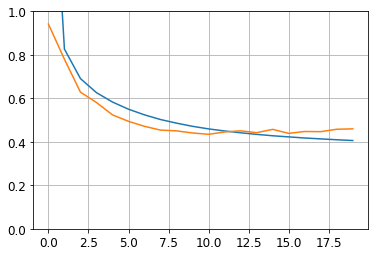

In [20]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### <font color='lightgreen'>**Prediction**</font>

In [21]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred[:3]

array([[0.7490798],
       [1.4009745],
       [3.2893457]], dtype=float32)

In [23]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [34]:
# Prediction
test_predictions = model.predict(X_test)

# Calculate error
pred_df = pd.DataFrame(y_test, columns=['Test Y'])
pred_df['Model Prediction'] = test_predictions
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Prediction']
pred_df.head()

,Test Y,Model Prediction,Error
0,0.47700,0.749080,-0.272080
1,0.45800,1.400974,-0.942974
2,5.00001,3.289346,1.710664
3,2.18600,2.478483,-0.292483
4,2.78000,2.458034,0.321966


#### <font color='lightgreen'>**Model Evaluation**</font>

In [35]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.4505


0.45050787925720215

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Train score, test score
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(training_score, test_score)

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = mean_squared_error(y_test, test_predictions)
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, test_predictions)
print("MAE: %.3f"  % mae)
      
# r2 - coefficient of determination
r2 = explained_variance_score(y_test, test_predictions)
print("r2: %.3f" %r2)

0.45395687222480774 0.45050787925720215
RMSE: 0.671
MSE: 0.451
MAE: 0.484
r2: 0.660


#### <font color='lightgreen'>**Saving and Restoring**</font>

In [37]:
model.save("california_housing_model1.h5")
model = keras.models.load_model("california_housing_model1.h5")
model.predict(X_new)

array([[0.7490798],
       [1.4009745],
       [3.2893457]], dtype=float32)

In [38]:
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

#### <font color='lightgreen'>**Hyperparameter Tuning & Early Stopping**</font>

In [42]:
keras.backend.clear_session()

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model =  keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss="mse", optimizer=optimizer)

  return model

In [43]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
keras_reg.fit(X_train, y_train, epochs=20,
              validation_data=(X_valid, y_valid),
              callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


363/363 [==============================] - 2s 4ms/step - loss: 1.2788 - val_loss: 7.3033
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6827 - val_loss: 2.7593
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5551 - val_loss: 0.7306
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5043 - val_loss: 0.5308
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4746 - val_loss: 0.4390
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4558 - val_loss: 0.4683
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4439 - val_loss: 0.4125
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4344 - val_loss: 0.4801
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4264 - val_loss: 0.3967
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4190 - val_loss: 0.4928
Epoch 11/2

In [44]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3872


#### <font color='lightgreen'>**RandomizedSearchCV**</font>

In [45]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

keras.backend.clear_session()
param_distribs = {
    "n_hidden": [2, 3],
    "n_neurons": np.arange(20, 22).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),

}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
242/242 [==============================] - 1s 4ms/step - loss: 0.6975 - val_loss: 0.4435
Epoch 2/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4414 - val_loss: 0.5119
Epoch 3/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4004 - val_loss: 0.3816
Epoch 4/10
242/242 [==============================] - 1s 4ms/step - loss: 0.3776 - val_loss: 1.1420
Epoch 5/10
242/242 [==============================] - 1s 4ms/step - loss: 0.3770 - val_loss: 0.4037
Epoch 6/10
242/242 [==============================] - 1s 4ms/step - loss: 0.3597 - val_loss: 0.3610
Epoch 7/10
242/242 [==============================] - 1s 4ms/step - loss: 0.3504 - val_loss: 0.8322
Epoch 8/10
242/242 [==============================] - 1s 4ms/step - loss: 0.3498 - val_loss: 0.8170
Epoch 9/10
242/242 [==============================] - 1s 4ms/step - loss: 0.3499 - val_loss: 0.6382
Epoch 10/10
121/121 [==================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7efdf0d34c50>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00121788348

In [46]:
rnd_search_cv.best_params_

{'n_neurons': 20, 'n_hidden': 3, 'learning_rate': 0.022427493184466196}

In [47]:
rnd_search_cv.best_score_

-0.34370388587315875

In [48]:
rnd_search_cv.best_estimator_

In [49]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3351


-0.33505550026893616

In [50]:
model = rnd_search_cv.best_estimator_.model
model

In [51]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3351


0.33505550026893616

---
---
# <font color='#f78fb3'> **3. Classification**<br> </font> 

### <font color='#f78fb3'> <font color='#f9ca24'>**3.1 Fashion MNISTS**<br> </font>  

#### <font color='lightgreen'>**Prepare data**</font>

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [53]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [54]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#### <font color='lightgreen'>**Construction Phase**</font>

In [55]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


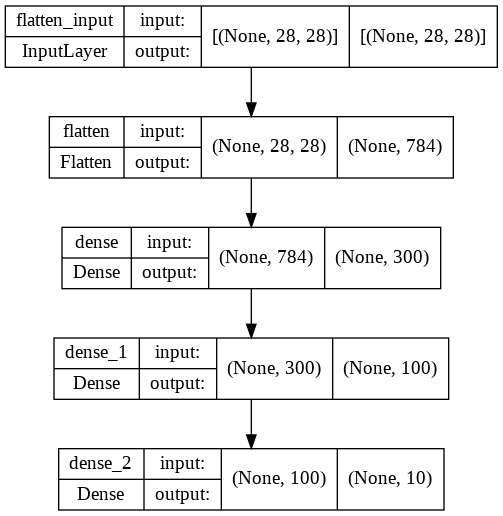

In [56]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [57]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

#### <font color='lightgreen'>**Execution Phase**</font>

In [58]:
model.compile(loss='sparse_categorical_crossentropy',  # keras.losses.sparse_categorical_crossentropy
              optimizer='sgd',   # keras.optimizers.SGD()
              metrics='accuracy')  # keras.metrics.sparse_category_accuracy
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7157 - accuracy: 0.7678 - val_loss: 0.5303 - val_accuracy: 0.8176
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4878 - accuracy: 0.8309 - val_loss: 0.4537 - val_accuracy: 0.8462
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4443 - accuracy: 0.8449 - val_loss: 0.4561 - val_accuracy: 0.8412
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4174 - accuracy: 0.8533 - val_loss: 0.4180 - val_accuracy: 0.8512
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3966 - accuracy: 0.8607 - val_loss: 0.3824 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8642 - val_loss: 0.4110 - val_accuracy: 0.8500
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8699 - val_loss: 0.3732 - val_accuracy:

In [59]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### <font color='lightgreen'>**Performance Evaluation**</font>

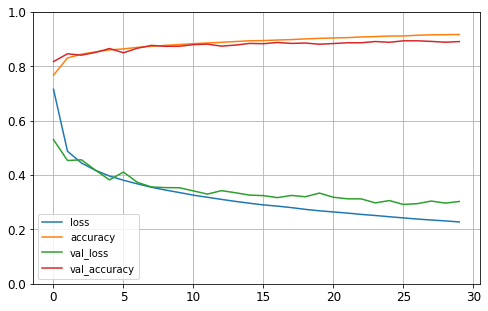

In [60]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8808


[0.33497652411460876, 0.8808000087738037]

#### <font color='lightgreen'>**Prediction**</font>

In [62]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [63]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

### <font color='#f78fb3'> <font color='#f9ca24'>**3.2 MNISTS**<br> </font>  

#### <font color='lightgreen'>**Dataset**</font>

In [64]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_full.shape, X_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [65]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#### <font color='lightgreen'>**Searching optimal learning rate**</font>
<font color='#3dc1d3'> 
+ Growing the learning rate exponentially
+ Plotting the loss, finding the point where the loss shoots up
+ Save checkpoints, use early stopping
+ Plot learning curves using TensorBoard </font>

In [66]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.rates = []
    self.losses = []
  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.learning_rate))
    self.losses.append(logs["loss"])
    K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [67]:
keras.backend.clear_session()
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])
expon_lr = ExponentialLearningRate(factor=1.005)

history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.6013 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

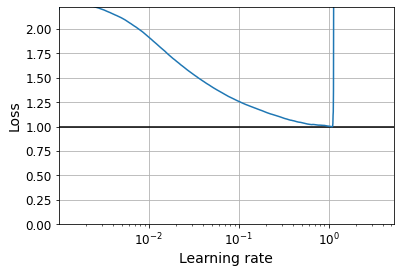

In [68]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [69]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [70]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [71]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2300 - accuracy: 0.9283 - val_loss: 0.1111 - val_accuracy: 0.9688
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.0878 - val_accuracy: 0.9762
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0893 - val_accuracy: 0.9744
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0997 - val_accuracy: 0.9714
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.0704 - val_accuracy: 0.9814
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0821 - val_accuracy: 0.9812
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0941 - val_ac

In [72]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9799


[0.07476909458637238, 0.9799000024795532]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir=./my_mnist_logs --port=6008